# Introduction

Purpose of this notebook is to understand if there are certain graphs in which the non-backtracking vector changes any order of the random walk backtracking vector. We will first utilize a brute force approach.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import classes.nb_general as NB_G 
import classes.visual_tools as VS
import scipy.linalg as la

# Creating Random Graphs
Code to test creating random graphs, finding page rank, back tracking page rank, and then reverting it back to normal graph.

/Users/tylerjones/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


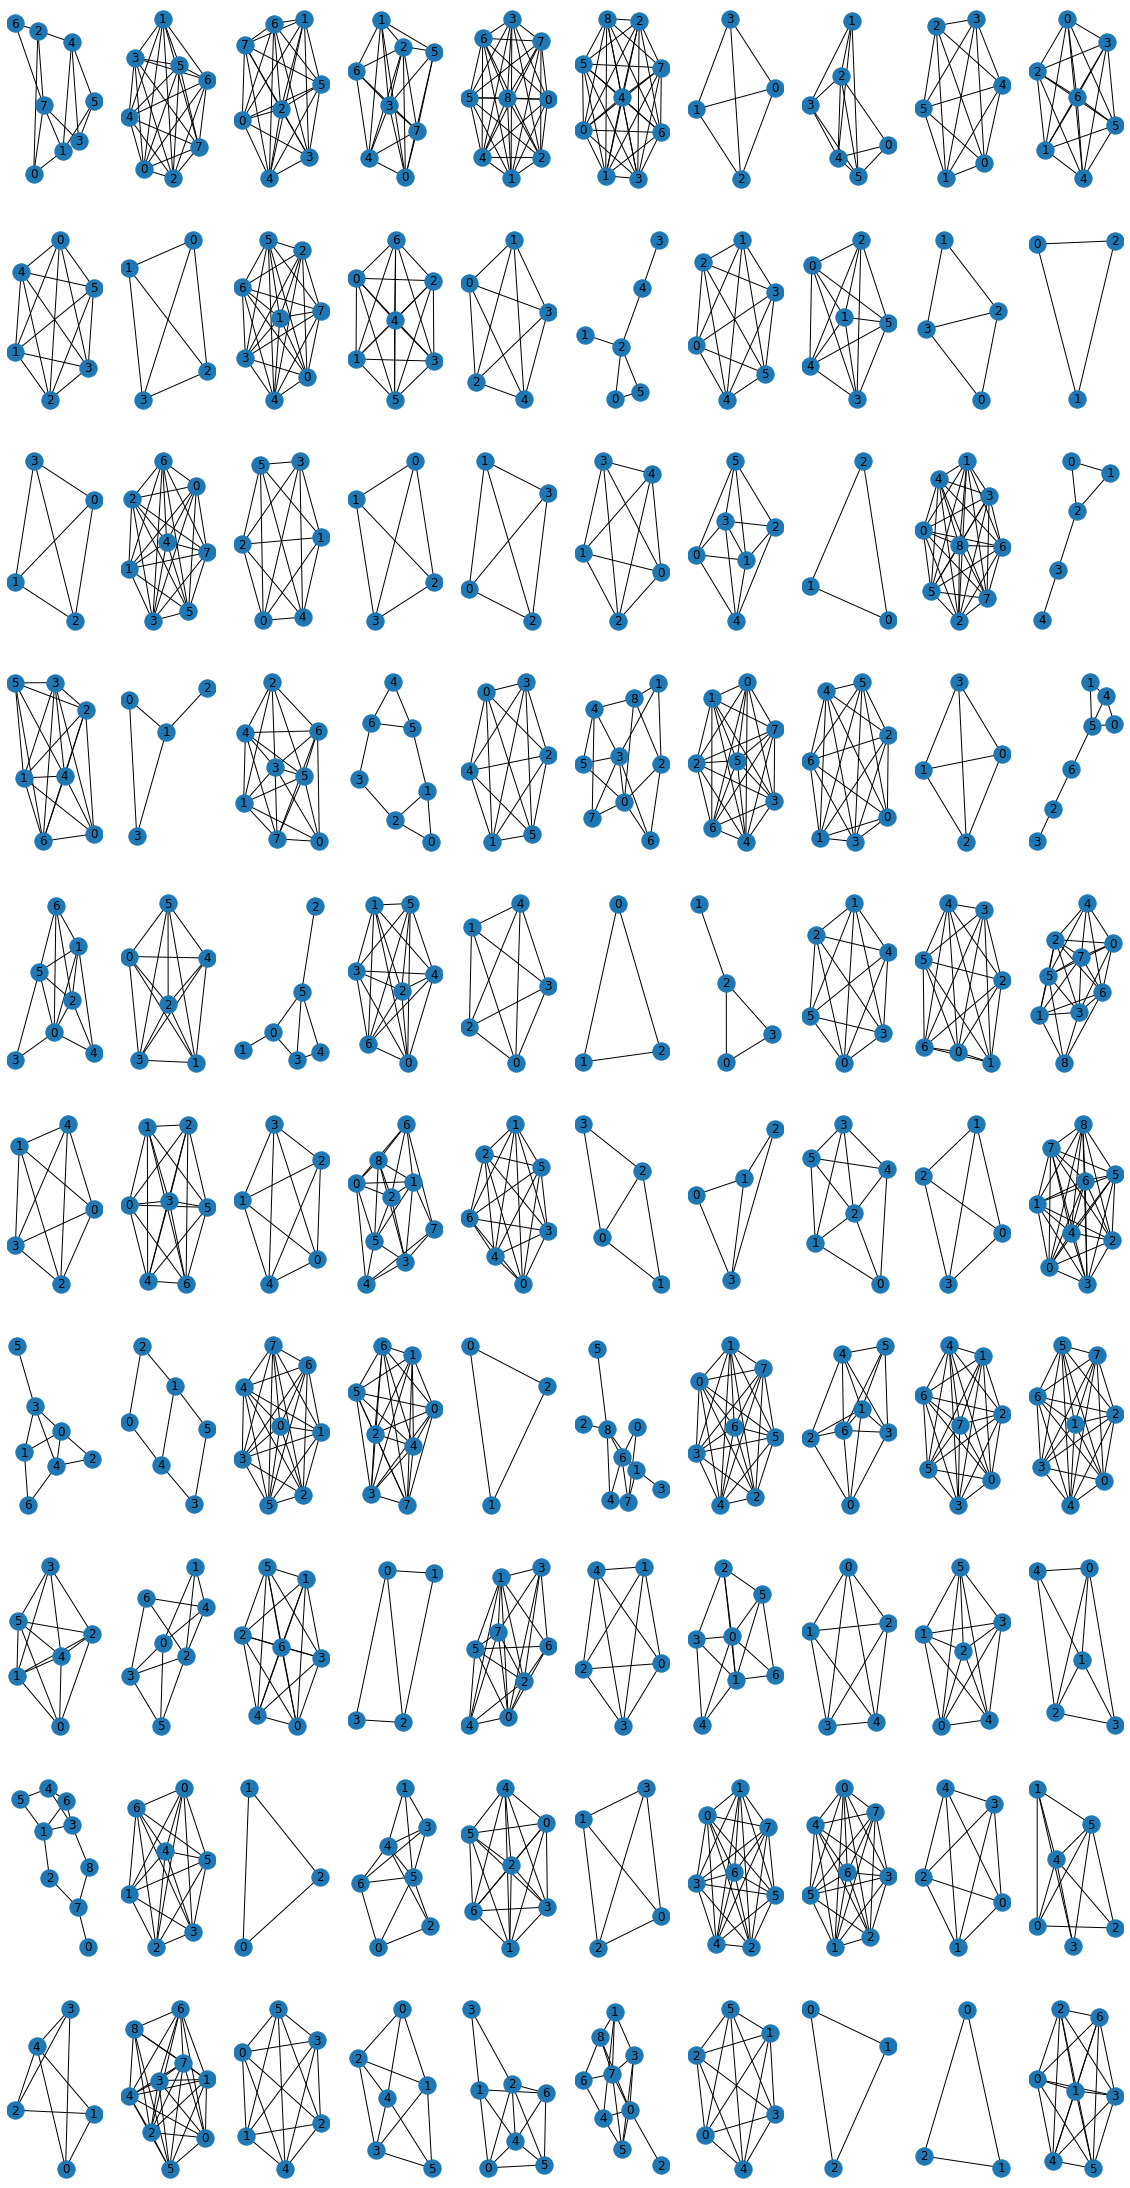

In [3]:
plt.figure(figsize=(20,40))

for i in range(100):
    E = np.random.randint(3, 10)
    V = np.random.randint(E, E*(E-1))
    
    G = nx.gnm_random_graph(E,V)
    plt.subplot(10,10,i+1)
    nx.draw(G, with_labels=True)
plt.show()

In [30]:
G = nx.gnm_random_graph(8,14)
C, B = NB_G.to_edge_space(G,graph=False, B = True)
S, T = NB_G.create_s_t(G)

/Users/tylerjones/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


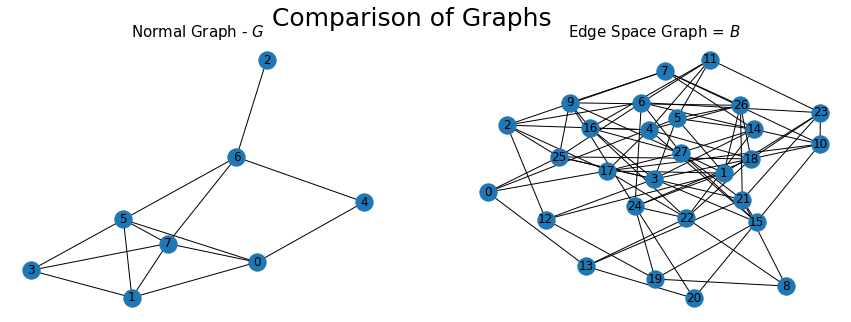

In [31]:
plt.figure(figsize=(15,5))
plt.suptitle('Comparison of Graphs\n', fontsize=25)
plt.subplot(121)
plt.title("Normal Graph - $G$", fontsize=15)
nx.draw(G,with_labels=True)
plt.subplot(122)
plt.title("Edge Space Graph = $B$", fontsize=15)
nx.draw(nx.from_numpy_array(B), with_labels=True)
plt.show()

In [32]:
# Get page rank of edge space graph 'B'
y_e = nx.pagerank(nx.Graph(B,alpha=.9))
pr_e = np.array(list(nx.pagerank(nx.Graph(B,alpha=.9)).values()))

# Get page rank of vertex space graph 'G'
y_v = nx.pagerank(nx.Graph(G,alpha=.9))
pr_v = np.array(list(nx.pagerank(nx.Graph(G,alpha=.9)).values()))

I can hit our edge space space vector $\hat{y}$ with $T$ to give us our non-backtracking page rank vector, but I'm not quite sure as to make sure I preserve the order. In example above:

In [33]:
print("Edge Space Page Rank Vector: \n{}".format(y_e))
print("\nNumpy Array: \n{}".format(np.array(list(y_e.values()))))

print("\n")

print("Vertex Space Page Rank Vector: \n{}".format(y_v))
print("\nNumpy Array: \n{}".format(np.array(list(y_v.values()))))

print("\n")
print("Non back-tracking: \n{}".format(T@pr_e))


Edge Space Page Rank Vector: 
{0: 0.025990141494913223, 1: 0.040542939469161626, 2: 0.03558809595494376, 3: 0.040542939469161626, 4: 0.04013500114180397, 5: 0.03558809595494376, 6: 0.04013500114180396, 7: 0.030088718564650993, 8: 0.02123995379436667, 9: 0.03509341671120724, 10: 0.03509341671120724, 11: 0.030088718564650993, 12: 0.025990141494913226, 13: 0.027035754971147224, 14: 0.04013500114180396, 15: 0.04174194160437492, 16: 0.03509341671120725, 17: 0.040542939469161626, 18: 0.045030737366882456, 19: 0.027035754971147224, 20: 0.021239953794366672, 21: 0.04174194160437492, 22: 0.04174194160437492, 23: 0.03509341671120724, 24: 0.04174194160437492, 25: 0.040542939469161626, 26: 0.04013500114180397, 27: 0.045030737366882456}

Numpy Array: 
[0.02599014 0.04054294 0.0355881  0.04054294 0.040135   0.0355881
 0.040135   0.03008872 0.02123995 0.03509342 0.03509342 0.03008872
 0.02599014 0.02703575 0.040135   0.04174194 0.03509342 0.04054294
 0.04503074 0.02703575 0.02123995 0.04174194 0.0417

# Here is my best shot at a function to compare ordering of Non-Backtracking vs Normal Page Rank

In [239]:
def comparison(V_m=10, m=25, plot=False):
    """ Run comparison on non-backtracking random walks vs random walks """
    

    for i in range(m):
        
        # Randomly choose vertex and edge count
        V = np.random.randint(3, V_m)
        E = np.random.randint(V, int(V*(V-1)/2)+1)

        # Create graph and relevant matrices
        G = nx.gnm_random_graph(V,E)
        C, B = NB_G.to_edge_space(G,graph=False, B = True)
        S, T = NB_G.create_s_t(G)

        # Get page rank of the edge space
        pr_e = np.array(list(nx.pagerank(nx.Graph(B,alpha=.9)).values()))
        
        # Get page rank of the vertex space
        pr_v = np.array(list(nx.pagerank(nx.Graph(G,alpha=.9)).values()))
        
        # Get projection of edge space to vertex space
        pr_ = T@pr_e
        
        # Look for how many vertices have higher, lower, and same scores for each vertex
        #alpha = []
        #for i in pr_v:
            
        print("Regular: \n{}".format(pr_v))
        print("Non backtracking: \n{}".format(pr_))
        
        print(np.argsort(pr_v))
        print(np.argsort(pr_))
        
        if plot:
            plt.figure(figsize=(15,5))
            plt.suptitle('Comparison of Graphs\n', fontsize=25)
            plt.subplot(121)
            plt.title("Normal Graph - $G$", fontsize=15)
            nx.draw(G,with_labels=True)
            plt.subplot(122)
            plt.title("Edge Space Graph - $B$", fontsize=15)
            nx.draw(nx.from_numpy_array(B), with_labels=True)
            plt.show()
            
            DOMAIN = np.arange(0, len(pr_v), 1)
            plt.figure(figsize=(15,5))
            plt.plot(DOMAIN, pr_v, 'o--', label='Original')
            plt.plot(DOMAIN, pr_,  'o--', label='Non-backtrack')
            plt.legend(loc='best')
            plt.show()
            
        print("\n")

Regular: 
[0.17844837 0.17844837 0.1815749  0.13853247 0.22171861 0.10127726]
Non backtracking: 
[0.18658695 0.18658695 0.18069665 0.12640034 0.24640826 0.07332085]
[5 3 0 1 2 4]
[5 3 2 0 1 4]


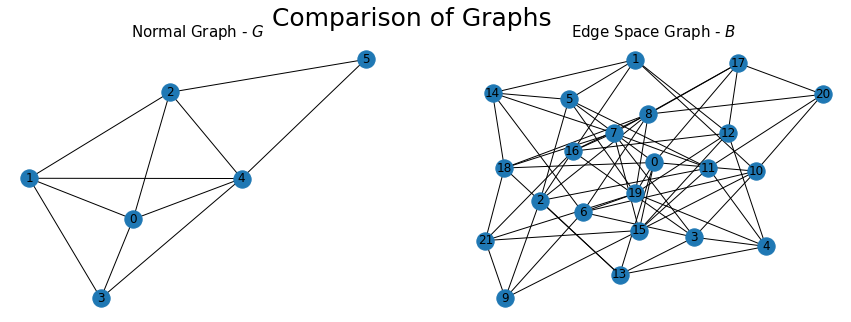

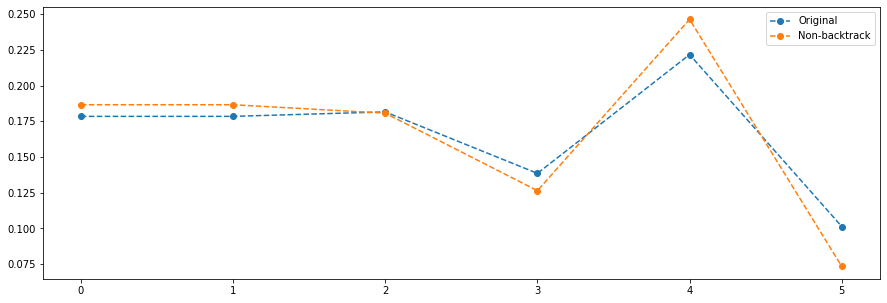



Regular: 
[0.23718617 0.05907169 0.15673698 0.09858735 0.10347997 0.14088979
 0.06315828 0.14088979]
Non backtracking: 
[0.30797683 0.04620938 0.13696613 0.07621408 0.09653526 0.15383645
 0.02842542 0.15383645]
[1 6 3 4 5 7 2 0]
[6 1 3 4 2 5 7 0]


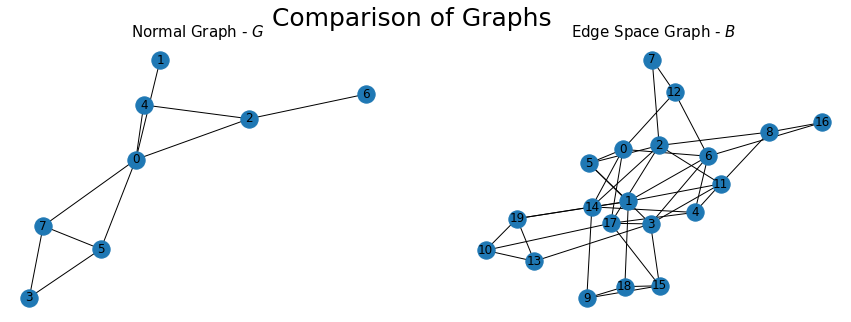

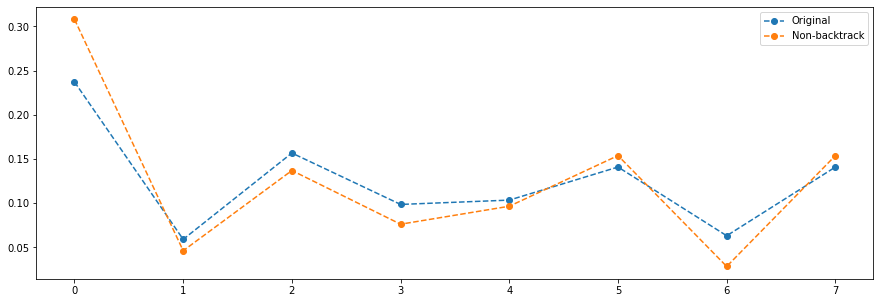



Regular: 
[0.21988292 0.21988292 0.21988292 0.17017563 0.17017563]
Non backtracking: 
[0.2281808 0.2281808 0.2281808 0.1577288 0.1577288]
[3 4 2 0 1]
[3 4 2 0 1]


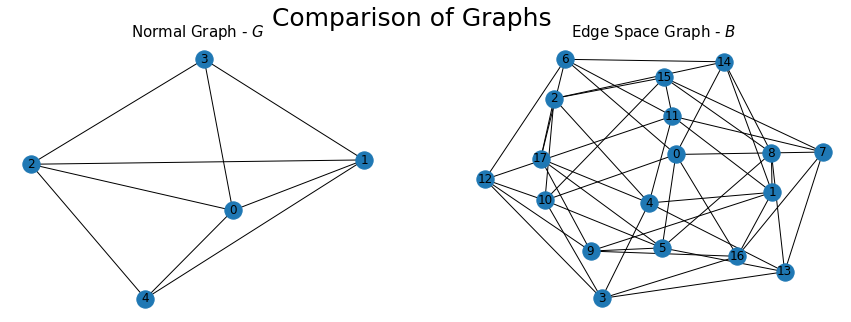

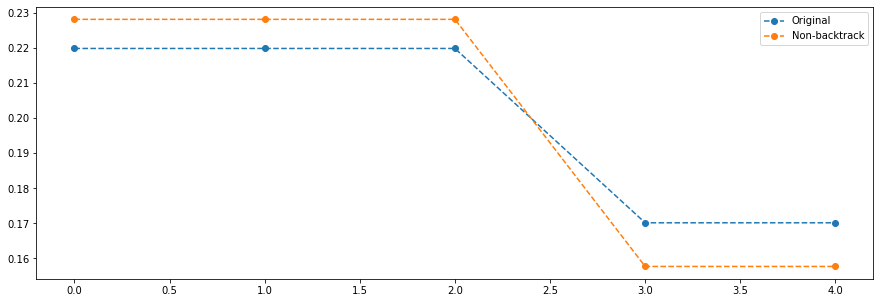



Regular: 
[0.22323927 0.16293859 0.07243806 0.21294178 0.21294178 0.11550053]
Non backtracking: 
[0.22754996 0.16966481 0.03694755 0.23621612 0.23621612 0.09340544]
[2 5 1 3 4 0]
[2 5 1 0 3 4]


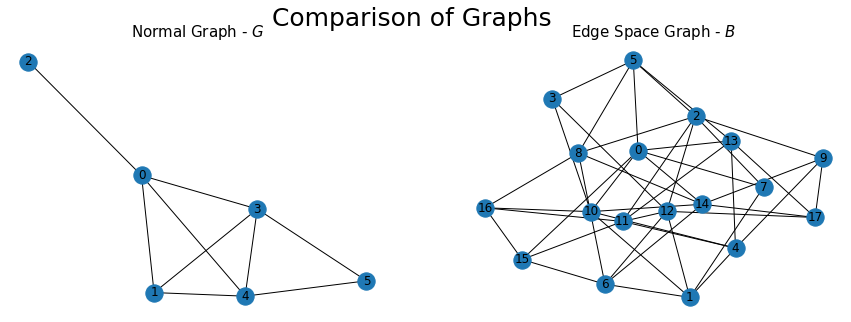

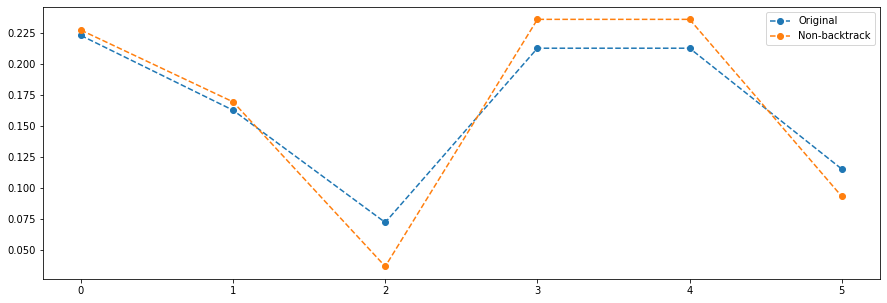



Regular: 
[0.33333333 0.33333333 0.33333333]
Non backtracking: 
[0.33333333 0.33333333 0.33333333]
[0 1 2]
[0 1 2]


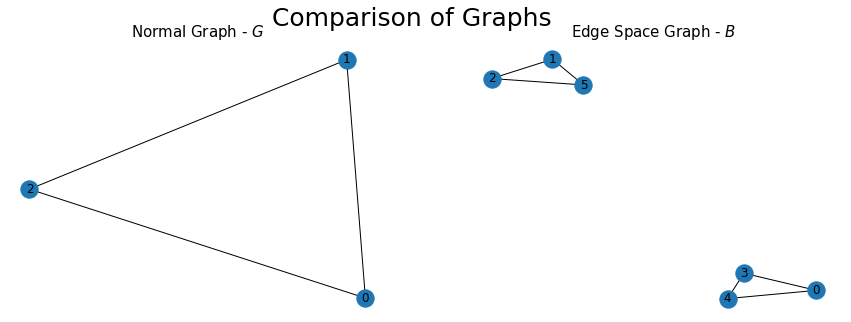

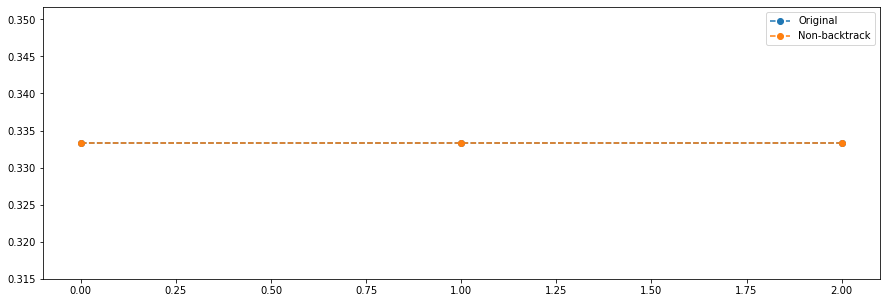



Regular: 
[0.33333333 0.33333333 0.33333333]
Non backtracking: 
[0.33333333 0.33333333 0.33333333]
[0 1 2]
[0 1 2]


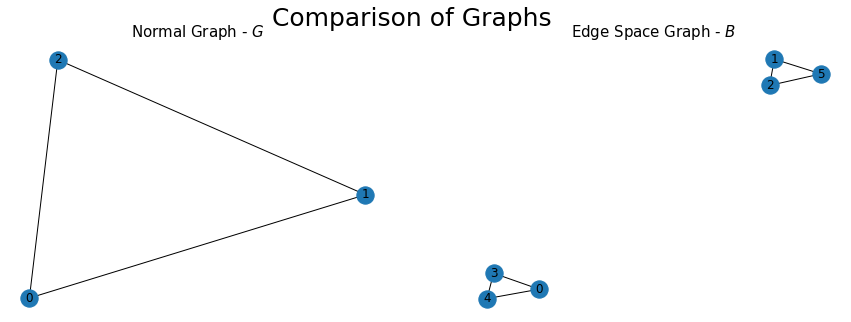

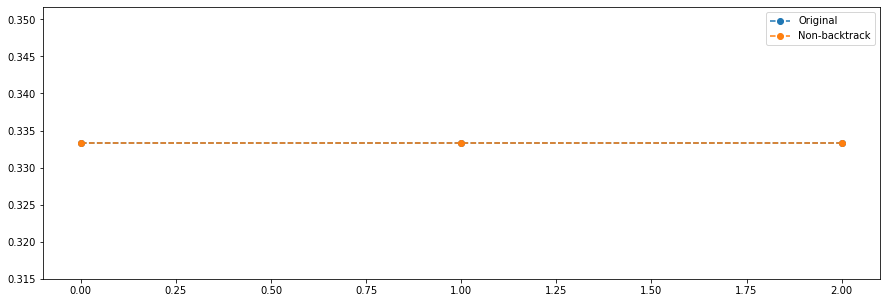



Regular: 
[0.24543511 0.18740966 0.18740966 0.24543511 0.13431045]
Non backtracking: 
[0.26146254 0.18459619 0.18459619 0.26146254 0.10788254]
[4 1 2 3 0]
[4 2 1 0 3]


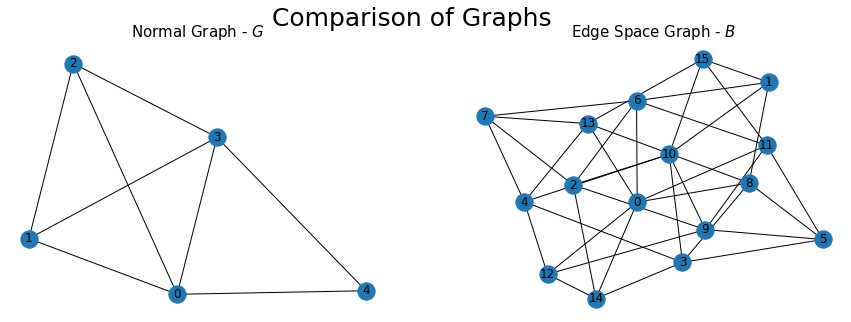

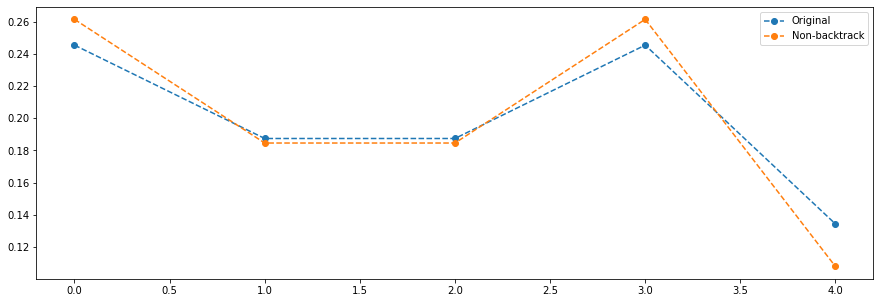



Regular: 
[0.2 0.2 0.2 0.2 0.2]
Non backtracking: 
[0.2 0.2 0.2 0.2 0.2]
[3 4 0 1 2]
[4 0 1 2 3]


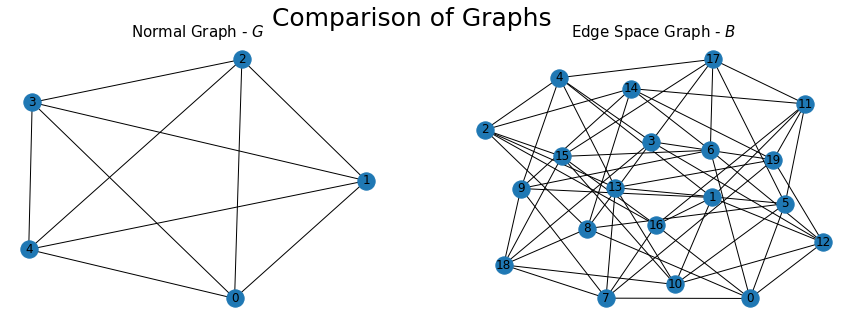

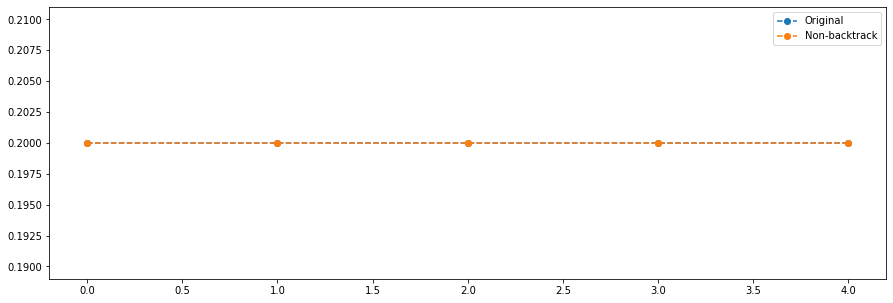



Regular: 
[0.18740966 0.18740966 0.24543511 0.13431045 0.24543511]
Non backtracking: 
[0.18459619 0.18459619 0.26146254 0.10788254 0.26146254]
[3 0 1 4 2]
[3 0 1 4 2]


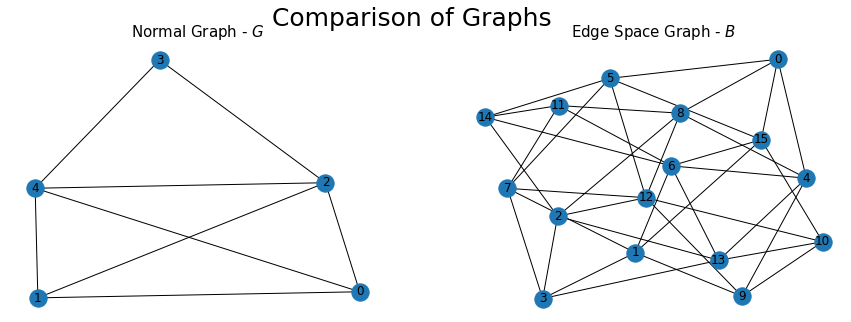

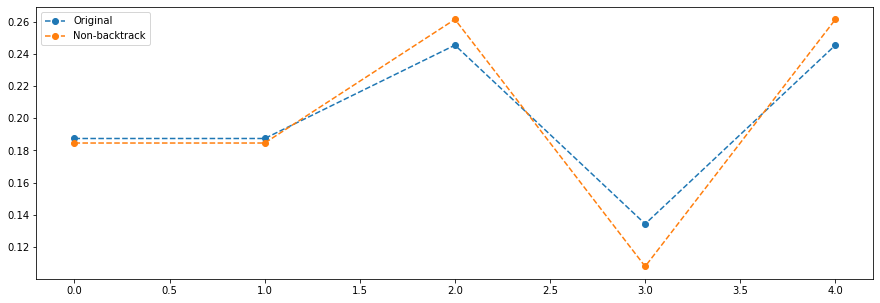



Regular: 
[0.19182193 0.12035409 0.2125996  0.19182193 0.28340244]
Non backtracking: 
[0.20306193 0.05074357 0.17689881 0.20306193 0.36623377]
[1 0 3 2 4]
[1 2 0 3 4]


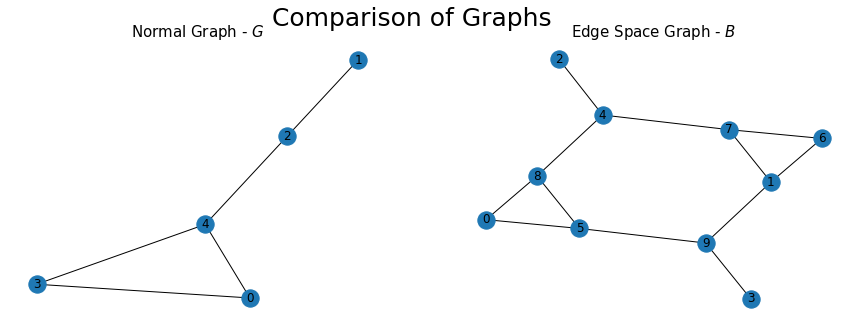

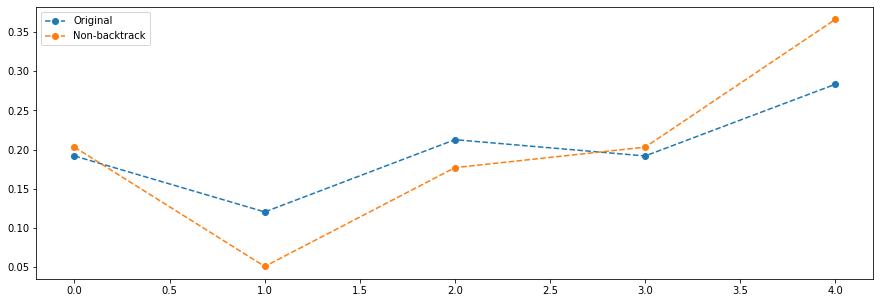



Regular: 
[0.1122874  0.29042519 0.1122874  0.19457481 0.29042519]
Non backtracking: 
[0.07452906 0.31926656 0.07452906 0.21240876 0.31926656]
[0 2 3 1 4]
[0 2 3 1 4]


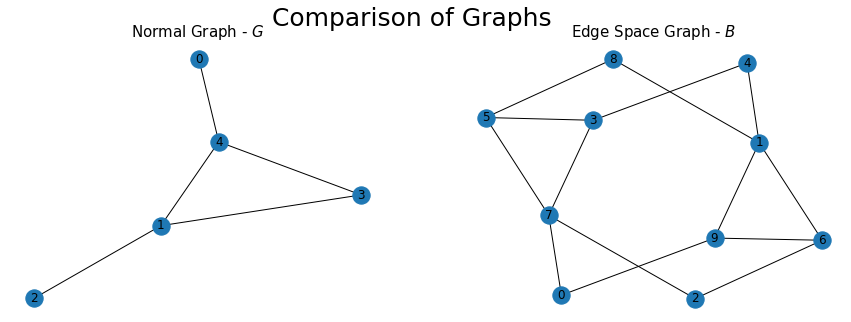

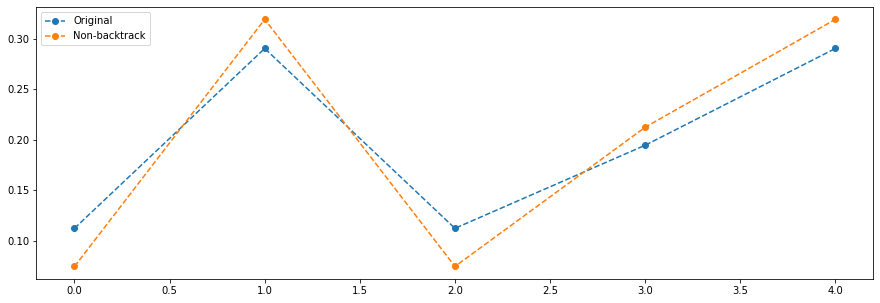



Regular: 
[0.12281894 0.1675761  0.08814647 0.19543371 0.08677264 0.05436017
 0.1598454  0.12504657]
Non backtracking: 
[0.11766395 0.17444337 0.06272186 0.24925839 0.06845159 0.02718847
 0.18136532 0.11890705]
[5 4 2 0 7 6 1 3]
[5 2 4 0 7 1 6 3]


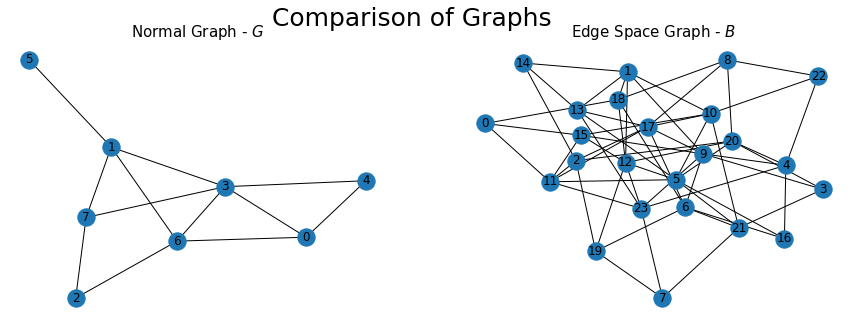

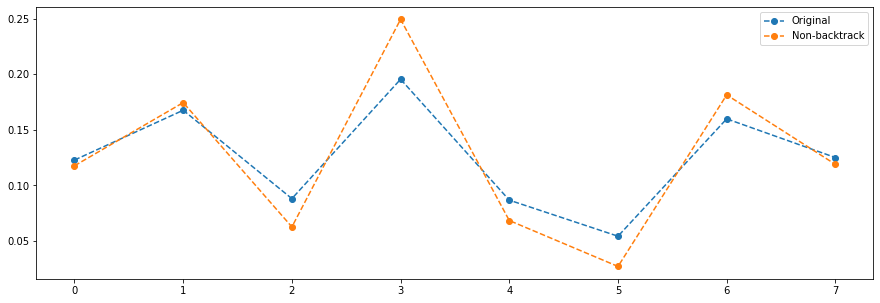



Regular: 
[0.19572088 0.15280302 0.1514761  0.15280302 0.1514761  0.19572088]
Non backtracking: 
[0.21526895 0.13853632 0.14619474 0.13853632 0.14619474 0.21526895]
[2 4 1 3 5 0]
[3 1 2 4 0 5]


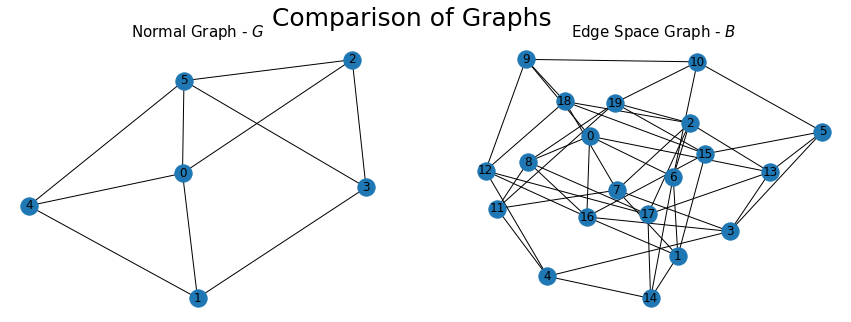

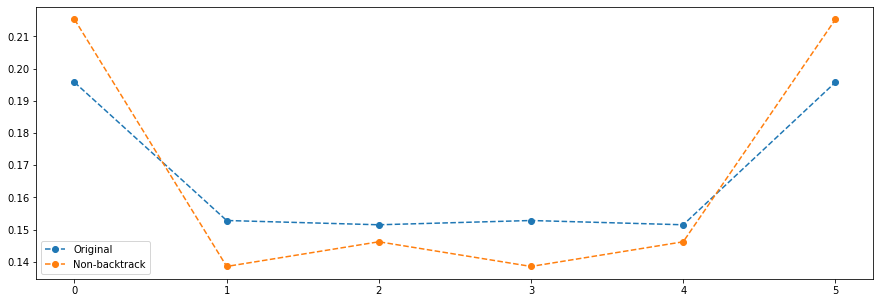



Regular: 
[0.33333333 0.33333333 0.33333333]
Non backtracking: 
[0.33333333 0.33333333 0.33333333]
[0 1 2]
[0 1 2]


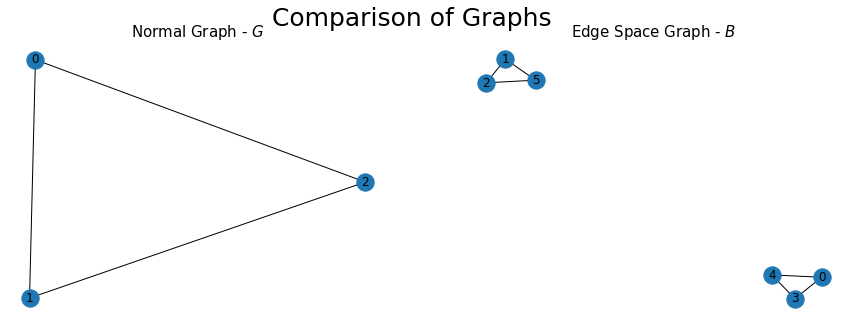

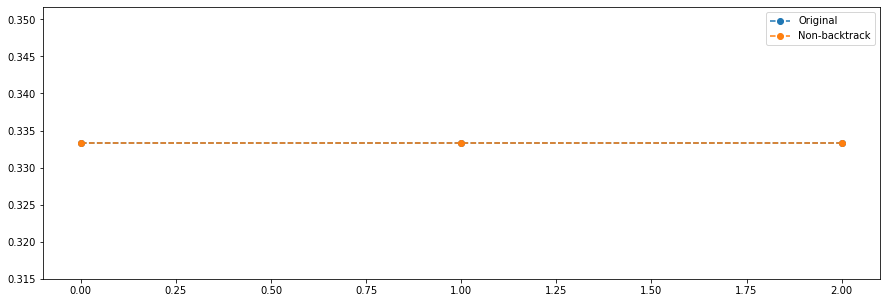



Regular: 
[0.1545931  0.1545931  0.12174199 0.18969061 0.18969061 0.18969061]
Non backtracking: 
[0.15052784 0.15052784 0.10235677 0.19886251 0.19886251 0.19886251]
[2 0 1 4 5 3]
[2 0 1 4 5 3]


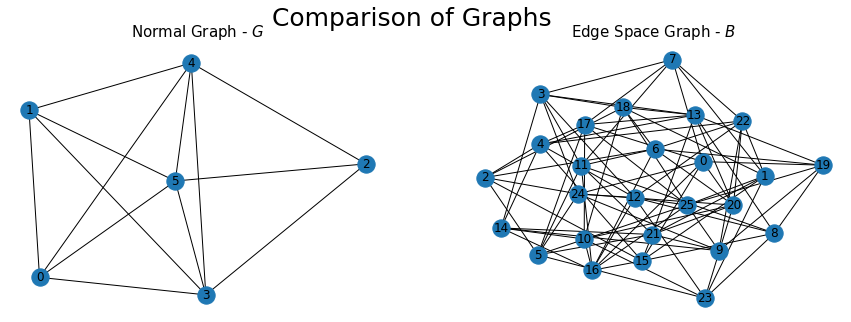

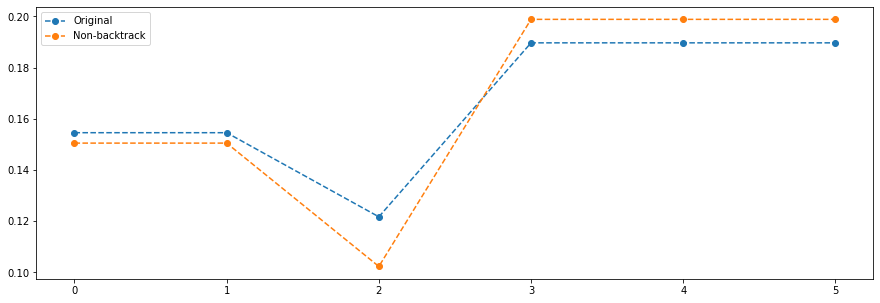



Regular: 
[0.2 0.2 0.2 0.2 0.2]
Non backtracking: 
[0.2 0.2 0.2 0.2 0.2]
[3 4 0 1 2]
[4 0 1 2 3]


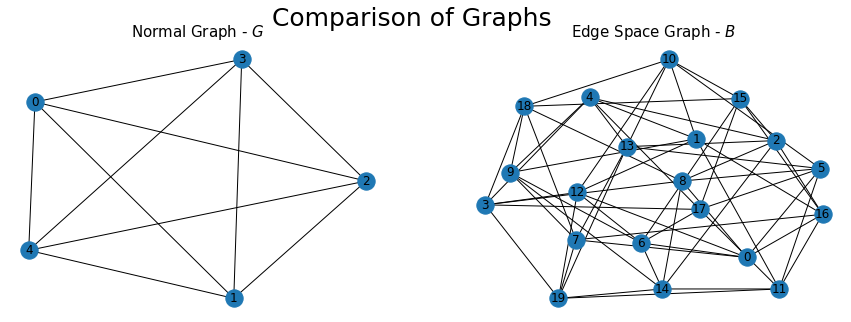

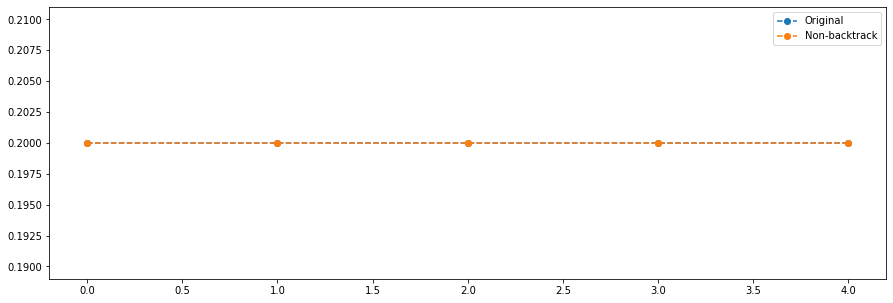



Regular: 
[0.09185172 0.16739774 0.12453259 0.09101084 0.16400257 0.20005866
 0.16114587]
Non backtracking: 
[0.06498879 0.16198076 0.12081542 0.07040962 0.16685453 0.23596972
 0.17898117]
[3 0 2 6 4 1 5]
[0 3 2 1 4 6 5]


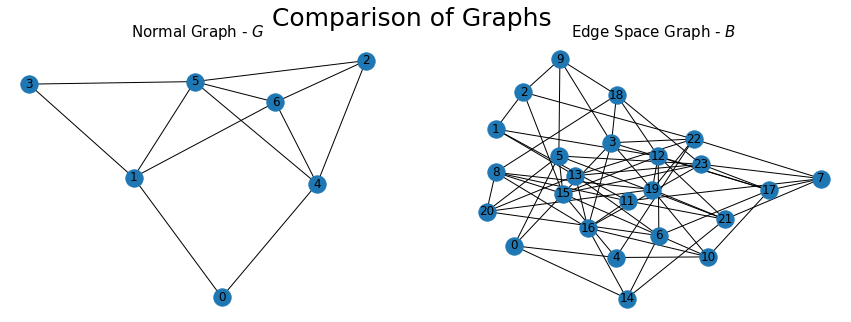

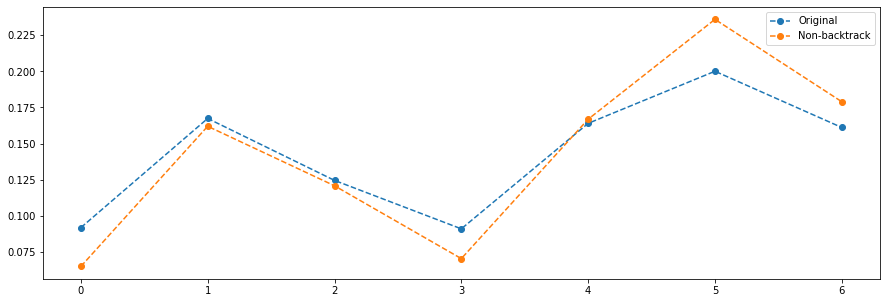



Regular: 
[0.24132175 0.09902913 0.16740376 0.16740376 0.32484161]
Non backtracking: 
[0.25069692 0.06945256 0.16017211 0.16017211 0.3595063 ]
[1 2 3 0 4]
[1 2 3 0 4]


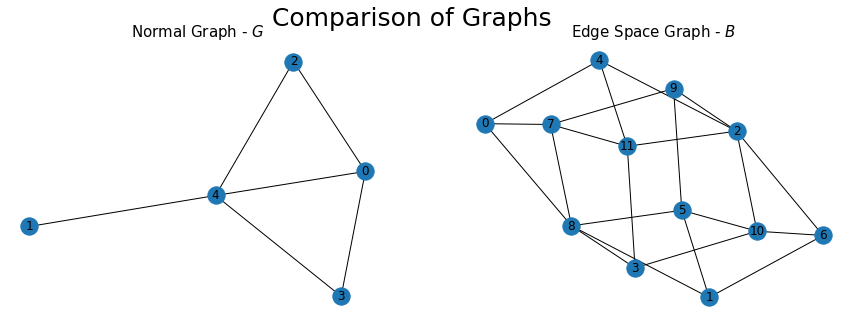

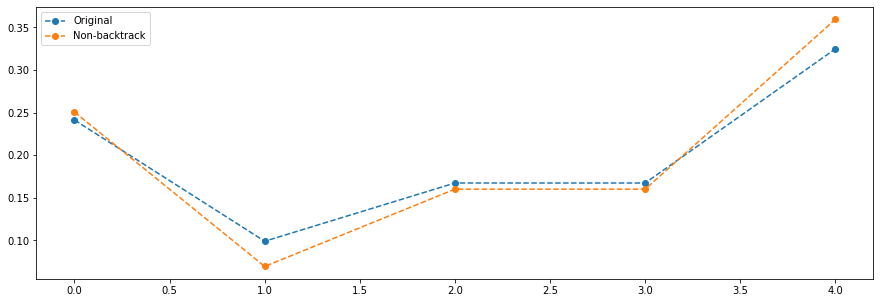



Regular: 
[0.12808838 0.24748454 0.07759005 0.12709457 0.18210335 0.2376391 ]
Non backtracking: 
[0.11824793 0.26315251 0.04635113 0.10592431 0.19121621 0.2751079 ]
[2 3 0 4 5 1]
[2 3 0 4 1 5]


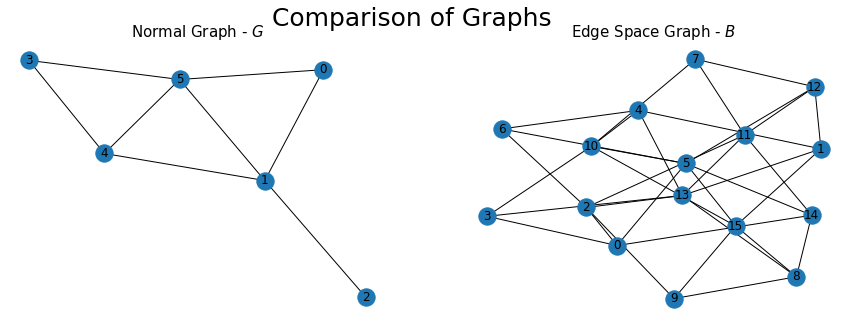

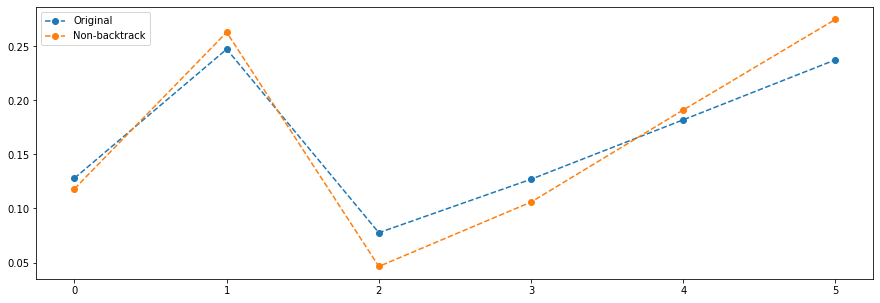



Regular: 
[0.14272238 0.14336398 0.08629855 0.2685425  0.21635021 0.14272238]
Non backtracking: 
[0.12688766 0.1451872  0.04604693 0.34409851 0.21089205 0.12688766]
[2 0 5 1 4 3]
[2 0 5 1 4 3]


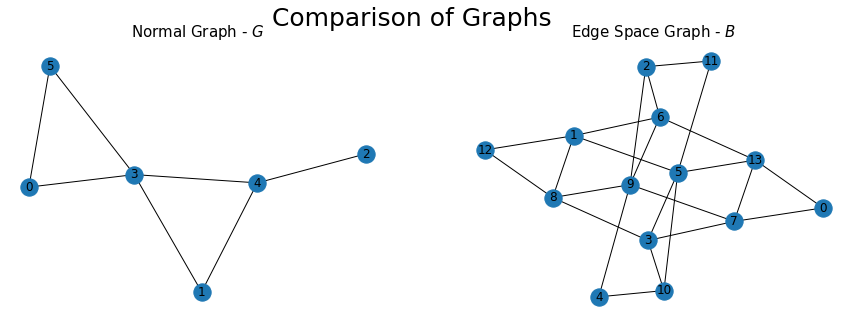

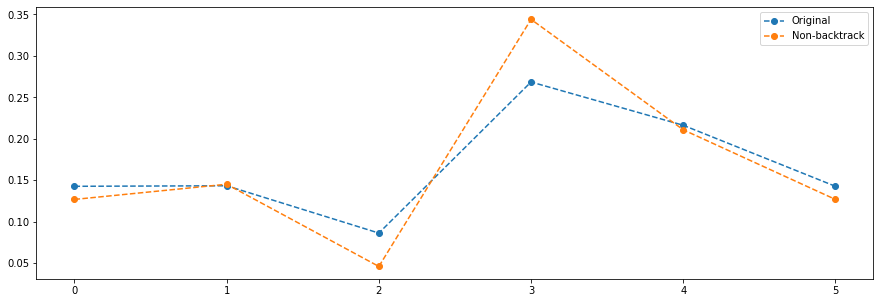



Regular: 
[0.18657646 0.07350948 0.09830239 0.19835505 0.04476725 0.10144314
 0.07119898 0.12754486 0.09830239]
Non backtracking: 
[0.23183786 0.05164016 0.10050129 0.21448418 0.02722921 0.08487934
 0.06320627 0.12572039 0.10050129]
[4 6 1 8 2 5 7 0 3]
[4 1 6 5 8 2 7 3 0]


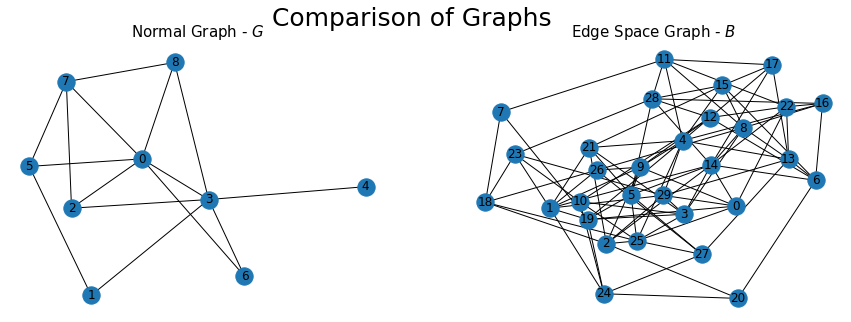

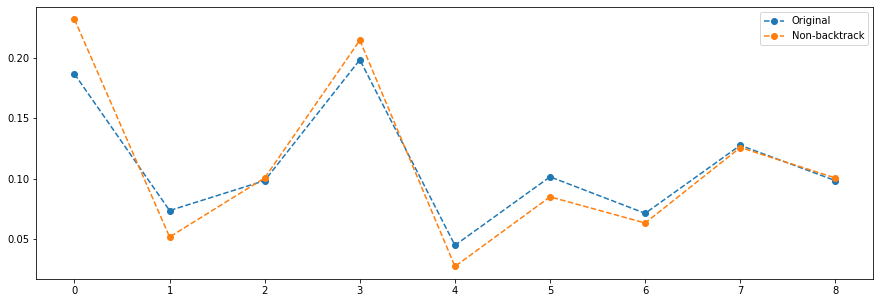



Regular: 
[0.16383525 0.13892476 0.1153074  0.13958629 0.13958629 0.13892476
 0.16383525]
Non backtracking: 
[0.1756054  0.13817728 0.100952   0.13574132 0.13574132 0.13817728
 0.1756054 ]
[2 1 5 3 4 0 6]
[2 3 4 1 5 0 6]


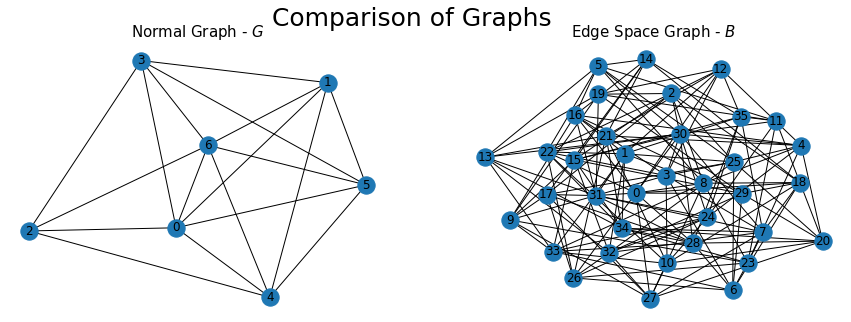

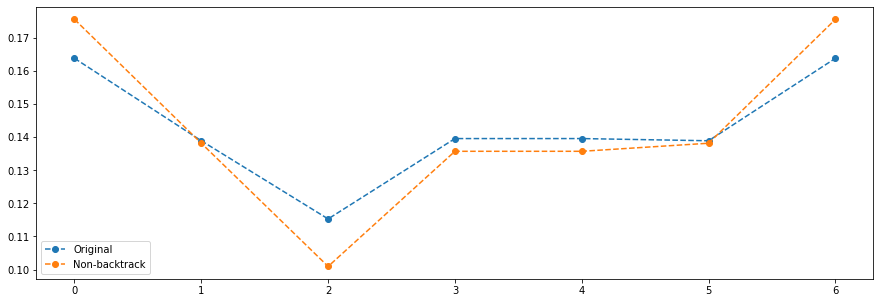



Regular: 
[0.13892476 0.1153074  0.13958629 0.13958629 0.16383525 0.16383525
 0.13892476]
Non backtracking: 
[0.13817728 0.100952   0.13574132 0.13574132 0.1756054  0.1756054
 0.13817728]
[1 0 6 2 3 5 4]
[1 2 3 6 0 4 5]


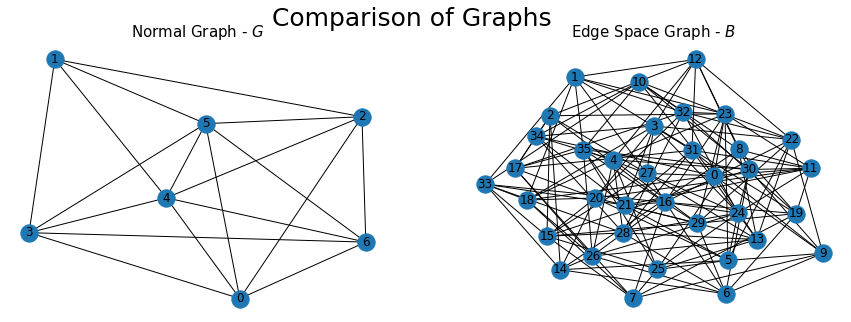

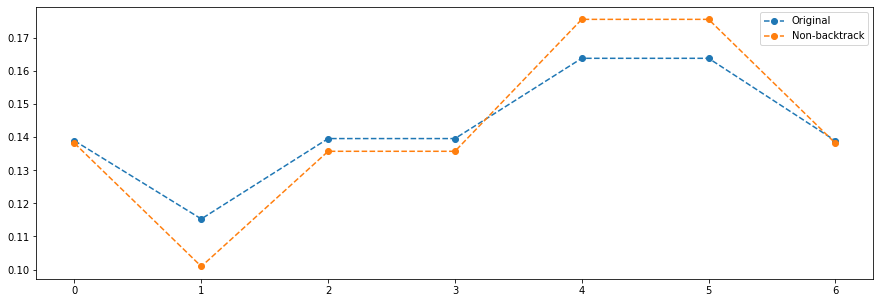



Regular: 
[0.33333333 0.33333333 0.33333333]
Non backtracking: 
[0.33333333 0.33333333 0.33333333]
[0 1 2]
[0 1 2]


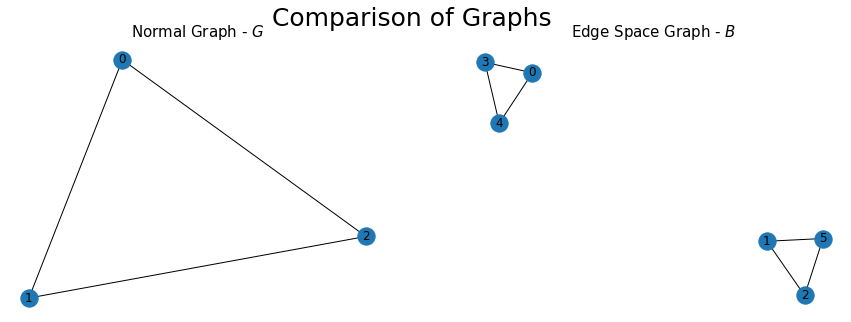

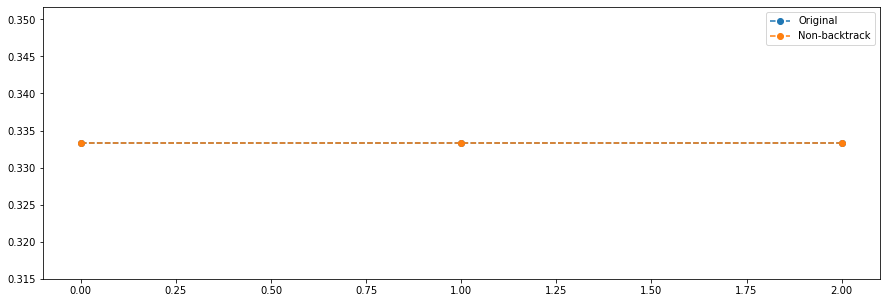



Regular: 
[0.06907591 0.12247252 0.12083811 0.15742075 0.1475109  0.12091413
 0.12415694 0.04342798 0.09418274]
Non backtracking: 
[0.04565997 0.1213783  0.12543194 0.16465209 0.17652995 0.13347631
 0.1221618  0.0220335  0.08867614]
[7 0 8 2 5 1 6 4 3]
[7 0 8 1 6 2 5 3 4]


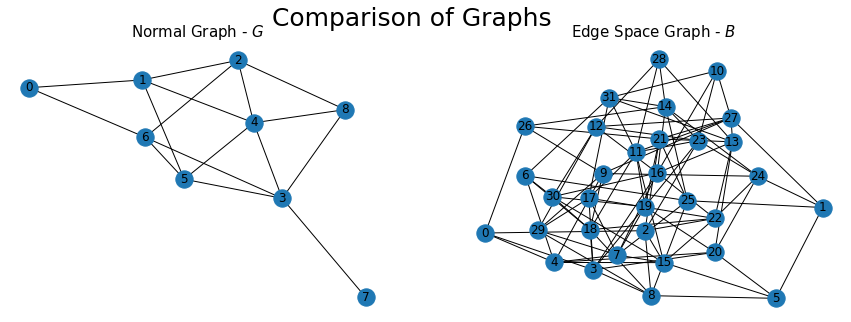

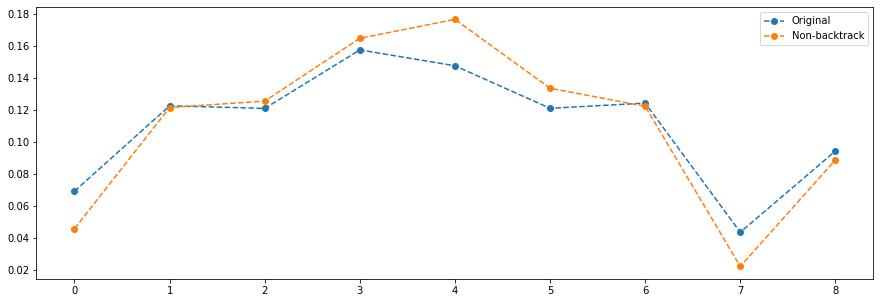

In [240]:
comparison(V_m=10, plot=True)

Seems to be a correlation or some rule where our normal page rank vector $\hat{x}$ has it's entries get slightly smaller or bigger based on some rule. It looks to be somewhat correlated with the degree of the vertex, but not exactly...